In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pdb
%matplotlib inline
import altair as alt
alt.renderers.enable('notebook')

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode()

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preview'] = True

import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

color = sns.color_palette('Spectral', n_colors=12)[::-1]

# Questions

- What are the most popular names?
- What are the trendiest names?
- What are unusually popular names per district?

- Ausländeranteil versus Geburtenrate?
- Alter versus Geburtenrate?

# Load Data

In [2]:
def load_data():
    " Parses data and return dataframe "
    bezirke = [
        'charlottenburg-wilmersdorf',
        'friedrichshain-kreuzberg',
        'lichtenberg',
        'marzahn-hellersdorf',
        'mitte',
        'neukoelln',
        'pankow',
        'reinickendorf',
        'spandau',
        'steglitz-zehlendorf',
        'tempelhof-schoeneberg',
        'treptow-koepenick'
    ]
    years = [2012, 2013, 2014, 2015, 2016, 2017]
    data_path = '../data/raw/'

    dfs = []
    for year in years:
        for bezirk in bezirke:
            df = pd.read_csv( data_path + str(year) +'-'+ bezirk + '.csv', sep=';')
            df = df.dropna()
            df = df.assign(bezirk=bezirk, year=year)
            total_number_names = df['anzahl'].sum()
            df = df.assign(frequency = lambda df: df['anzahl']/total_number_names )
            df['bezirk'] = df['bezirk'].apply(str.title).str.replace('oe', 'ö')
            #df_m = df[df['geschlecht']=='m']
            #print(df_m[ df_m['frequency'] == df_m['frequency'].max() ]['vorname'])
            dfs.append(df)

    df = pd.concat(dfs)
    return df

df = load_data()

In [3]:
df.head()

anzahl                      bezirk  frequency geschlecht  position  \
0     122  Charlottenburg-Wilmersdorf   0.013676          w       NaN   
1     105  Charlottenburg-Wilmersdorf   0.011770          w       NaN   
2      78  Charlottenburg-Wilmersdorf   0.008743          w       NaN   
3      69  Charlottenburg-Wilmersdorf   0.007735          w       NaN   
4      66  Charlottenburg-Wilmersdorf   0.007398          m       NaN   

     vorname  year  
0      Marie  2012  
1     Sophie  2012  
2  Charlotte  2012  
3      Maria  2012  
4       Paul  2012

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171090 entries, 0 to 1429
Data columns (total 7 columns):
anzahl        171090 non-null int64
bezirk        171090 non-null object
frequency     171090 non-null float64
geschlecht    171090 non-null object
position      35101 non-null float64
vorname       171090 non-null object
year          171090 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 10.4+ MB


## Einwohnerzahlen

In [5]:
def load_demography():
    demography = pd.read_csv('../data/raw/EWR_Ortsteile_2016-06-30.csv', sep=';', encoding='latin-1')
    demography = demography.drop(['Bezirk','Ortsteil','Ortst-Name'], axis=1)
    demography = demography.rename(columns={'Bez-Name': 'bezirk'})
    return demography

demography = load_demography()
demography.head()

bezirk  Geschl Staatsangeh Altersgr  Häufigkeit
0  Mitte       1           A    00_05         375
1  Mitte       1           A    05_10         335
2  Mitte       1           A    10_15         249
3  Mitte       1           A    15_20         291
4  Mitte       1           A    20_25         933

In [6]:
population = demography.groupby(by='bezirk').sum()['Häufigkeit']
population.name = 'population'
population.head()

bezirk
Charlottenburg-Wilmersdorf    334351
Friedrichshain-Kreuzberg      281076
Lichtenberg                   280721
Marzahn-Hellersdorf           261954
Mitte                         368122
Name: population, dtype: int64

## Total number names per district

In [7]:
counts_districts = df.copy()
# counts['bezirk'] = counts['bezirk'].apply(str.title).str.replace('oe', 'ö')
counts_districts = counts_districts.groupby(by=['bezirk','year']).count()['anzahl']
counts_districts.to_csv('../data/processed/counts.csv', header=True)
counts_districts.head()

bezirk                      year
Charlottenburg-Wilmersdorf  2012    3302
                            2013    3233
                            2014    3414
                            2015    3388
                            2016    3550
Name: anzahl, dtype: int64

In [8]:
counts_pivoted = counts_districts.reset_index(level=0).pivot(columns='bezirk')
counts_pivoted.head()

anzahl                                       \
bezirk Charlottenburg-Wilmersdorf Friedrichshain-Kreuzberg Lichtenberg   
year                                                                     
2012                         3302                     2797        1768   
2013                         3233                     2829        1929   
2014                         3414                     3113        2034   
2015                         3388                     3194        2054   
2016                         3550                     3520        2187   

                                                                        \
bezirk Marzahn-Hellersdorf Mitte Neukölln Pankow Reinickendorf Spandau   
year                                                                     
2012                   896  3597     2591   2433          1166    2300   
2013                   925  3401     2723   2340          1260    2231   
2014                   890  3628     2754   2400          1304    2412   
2015                  1010  3641     2760   2574          1239    2417   
2016                  1039  3850     2750   2555          1221    2553   

                                                                  
bezirk Steglitz-Zehlendorf Tempelhof-Schöneberg Treptow-Köpenick  
year                                                              
2012                   999                 3150             1002  
2013                   922                 3332              973  
2014                   957                 3308             1036  
2015                   925                 3397              963  
2016                  1089                 3636             1128

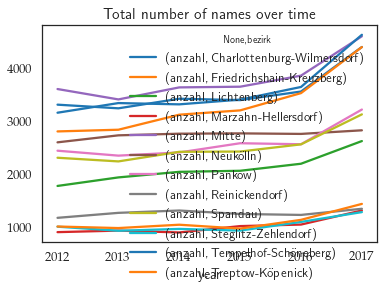

In [9]:
counts_pivoted.plot(kind='line')
plt.title("Total number of names over time")
plt.show()

In [10]:
import bokeh.plotting as bk
# from bokeh import mpl

bk.output_notebook()

Loading BokehJS ...

In [91]:

from bokeh.palettes import Spectral11
from bokeh.models import Legend

bk.reset_output()
bk.output_notebook()

p = bk.figure(toolbar_location="above", plot_width=750, plot_height=400, x_range=[2012, 2017])

colors = sns.color_palette('Spectral', n_colors=12).as_hex()[::-1]

# bk.output_file('temp.html')

# p.line('year', 'anzahl', source=counts_pivoted)
# p.multi_line('year', 'anzahl', source=counts_pivoted)
# p.multi_line(xs=[counts_pivoted.index.values]*12,
#             ys=[counts_pivoted['anzahl'][col].values for col in counts_pivoted['anzahl'].columns],
#              line_color = color,
#              line_width = 5,
#              legend=counts_pivoted['anzahl'].columns.values
#      )
lines = []
for bezirk, color in zip(counts_pivoted['anzahl'].columns.values, colors):
    line = p.line(counts_pivoted.index.values, counts_pivoted['anzahl'][bezirk],
            line_color = color,
           line_width = 5,
          line_alpha = 0.9,
#            legend=bezirk,
           muted_alpha=0.1,
          )
    lines.append(line)


# p.legend.location = 'top_right'
# p.legend.click_policy = 'hide'

# Manual legend
legend = Legend(items=[(bezirk, [line]) for bezirk, line in zip(counts_pivoted['anzahl'].columns.values, lines)],
               location = (10,50))
p.add_layout(legend, 'right')
p.legend.click_policy = 'mute'

p.legend.border_line_width = 2
p.legend.border_line_color = "grey"
p.legend.border_line_alpha = 0.3

bk.show(p)

Loading BokehJS ...

### Stacked area

In [53]:
total_per_year = counts_pivoted.sum(axis=1).values
ordered_cols = counts_pivoted.sum(axis=0).sort_values(ascending=False)
ordered_cols = ordered_cols.reset_index()['bezirk'].values.tolist()

In [54]:
counts_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 2012 to 2017
Data columns (total 12 columns):
(anzahl, Charlottenburg-Wilmersdorf)    6 non-null int64
(anzahl, Friedrichshain-Kreuzberg)      6 non-null int64
(anzahl, Lichtenberg)                   6 non-null int64
(anzahl, Marzahn-Hellersdorf)           6 non-null int64
(anzahl, Mitte)                         6 non-null int64
(anzahl, Neukölln)                      6 non-null int64
(anzahl, Pankow)                        6 non-null int64
(anzahl, Reinickendorf)                 6 non-null int64
(anzahl, Spandau)                       6 non-null int64
(anzahl, Steglitz-Zehlendorf)           6 non-null int64
(anzahl, Tempelhof-Schöneberg)          6 non-null int64
(anzahl, Treptow-Köpenick)              6 non-null int64
dtypes: int64(12)
memory usage: 624.0 bytes


In [55]:
counts_pivoted

anzahl                                       \
bezirk Charlottenburg-Wilmersdorf Friedrichshain-Kreuzberg Lichtenberg   
year                                                                     
2012                         3302                     2797        1768   
2013                         3233                     2829        1929   
2014                         3414                     3113        2034   
2015                         3388                     3194        2054   
2016                         3550                     3520        2187   
2017                         4391                     4389        2615   

                                                                        \
bezirk Marzahn-Hellersdorf Mitte Neukölln Pankow Reinickendorf Spandau   
year                                                                     
2012                   896  3597     2591   2433          1166    2300   
2013                   925  3401     2723   2340          1260    2231   
2014                   890  3628     2754   2400          1304    2412   
2015                  1010  3641     2760   2574          1239    2417   
2016                  1039  3850     2750   2555          1221    2553   
2017                  1305  4593     2818   3210          1337    3119   

                                                                  
bezirk Steglitz-Zehlendorf Tempelhof-Schöneberg Treptow-Köpenick  
year                                                              
2012                   999                 3150             1002  
2013                   922                 3332              973  
2014                   957                 3308             1036  
2015                   925                 3397              963  
2016                  1089                 3636             1128  
2017                  1274                 4621             1429

In [61]:
traces = []

x = list(range(2012,2018))
data = []
prev_values = np.zeros(6)
for header, anzahl in counts_pivoted['anzahl'][ordered_cols].items():
    bezirk = header
    values = (anzahl.values*100 / total_per_year) + prev_values
#     print(values)
    prev_values = values
    trace = go.Scatter(
        x=x,
        y=values,
        mode='lines',
        fill='tonexty',
        name=bezirk,
    )
    data.append(trace)
    
layout = go.Layout(
    showlegend=True,
    autosize=False,
    width=800,
    height=1000,
    xaxis=dict(
        type='category',
    ),
    yaxis=dict(
        type='linear',
        range=[1, 100],
        dtick=20,
        ticksuffix='%'
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-area-plot')

### As map

In [62]:
counts2016 = df[ df['year']==2016 ].groupby(by='bezirk').sum().reset_index()
counts2016 = counts2016.rename(columns = {'bezirk': 'id'})
counts2016.head()

id  anzahl  frequency  position     year
0  Charlottenburg-Wilmersdorf    9643        1.0       0.0  7156800
1    Friedrichshain-Kreuzberg    8520        1.0       0.0  7096320
2                 Lichtenberg    5329        1.0       0.0  4408992
3         Marzahn-Hellersdorf    1916        1.0       0.0  2094624
4                       Mitte    8354        1.0       0.0  7761600

In [63]:
import geojson
geo = geojson.load(open('../data/processed/bezirke.topojson','r'))

In [64]:
shap = geojson.FeatureCollection(geo)

In [65]:
# bezirke = alt.topo_feature('../data/processed/bezirke.topojson', 'states')
bezirke = alt.topo_feature('bezirke.topojson', 'states')


variable_list = ['anzahl']

alt.Chart(bezirke).mark_geoshape().properties(
        projection={'type': 'mercator'},
        width=500,
        height=300,
).encode(
    alt.Color(alt.repeat('row'), type='quantitative')
#     color='anzahl:Q',
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(counts2016, 'id', variable_list)
)
# .repeat(
#     row=variable_list
# ).resolve_scale(
#     color='independent'
# )

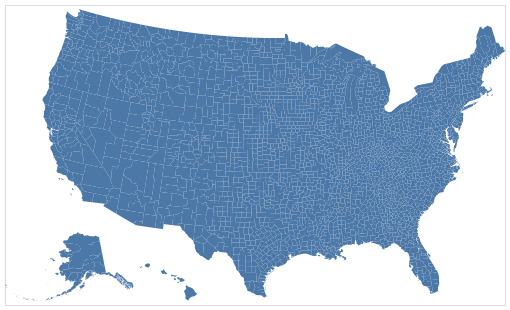

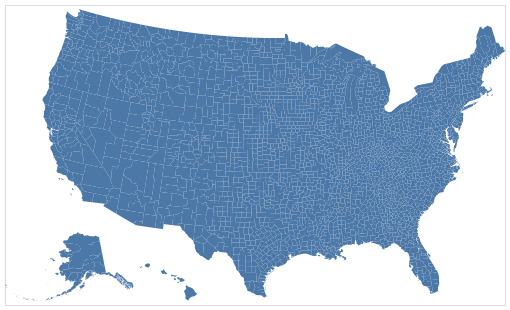

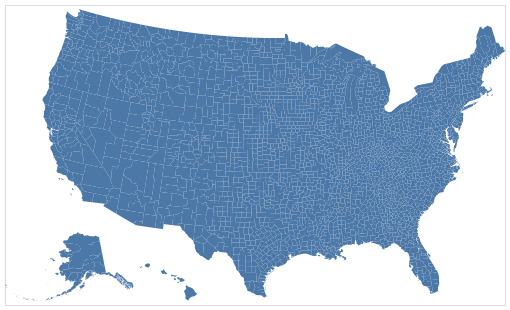

In [66]:
import altair as alt
from vega_datasets import data

counties = alt.topo_feature(data.us_10m.url, 'counties')
unemp_data = data.unemployment.url


alt.Chart(counties).mark_geoshape().properties(
    projection={'type': 'albersUsa'},
    width=500,
    height=300
)
# ).encode(
#     color='rate:Q'
# ).transform_lookup(
#     lookup='id',
#     from_=alt.LookupData(unemp_data, 'id', ['rate'])
# )

In [69]:
# from vega_datasets import data
# pd.read_csv(data.unemployment.url).head()

### Percentual change

In [73]:
start_values = counts_pivoted['anzahl'].loc[2012]
freq_change = counts_pivoted['anzahl'] / start_values
freq_change.head()

bezirk  Charlottenburg-Wilmersdorf  Friedrichshain-Kreuzberg  Lichtenberg  \
year                                                                        
2012                      1.000000                  1.000000     1.000000   
2013                      0.979104                  1.011441     1.091063   
2014                      1.033919                  1.112978     1.150452   
2015                      1.026045                  1.141938     1.161765   
2016                      1.075106                  1.258491     1.236991   

bezirk  Marzahn-Hellersdorf     Mitte  Neukölln    Pankow  Reinickendorf  \
year                                                                       
2012               1.000000  1.000000  1.000000  1.000000       1.000000   
2013               1.032366  0.945510  1.050946  0.961776       1.080617   
2014               0.993304  1.008618  1.062910  0.986436       1.118353   
2015               1.127232  1.012232  1.065226  1.057953       1.062607   
2016               1.159598  1.070336  1.061366  1.050144       1.047170   

bezirk   Spandau  Steglitz-Zehlendorf  Tempelhof-Schöneberg  Treptow-Köpenick  
year                                                                           
2012    1.000000             1.000000              1.000000          1.000000  
2013    0.970000             0.922923              1.057778          0.971058  
2014    1.048696             0.957958              1.050159          1.033932  
2015    1.050870             0.925926              1.078413          0.961078  
2016    1.110000             1.090090              1.154286          1.125749

In [74]:
x = list(range(2012,2018))
data = []
prev_values = np.zeros(6)
for header, anzahl in freq_change[ordered_cols].items():
    bezirk = header
    values = anzahl.values * 100
    trace = go.Scatter(
        x=x,
        y=values,
        mode='lines',
        name=bezirk,
    )
    data.append(trace)
    
layout = go.Layout(
    showlegend=True,
    autosize=False,
    width=800,
    height=1000,
    xaxis=dict(
        type='category',
    ),
    yaxis=dict(
        type='linear',
#         range=[1, 100],
        dtick=20,
        ticksuffix='%'
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-area-plot')

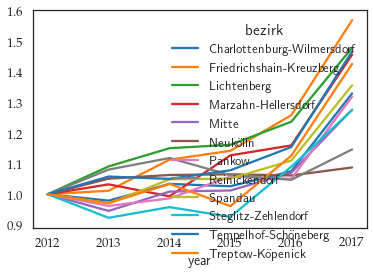

In [75]:
freq_change.plot(kind='line')
plt.show()

## Comparison: Size vs. growth

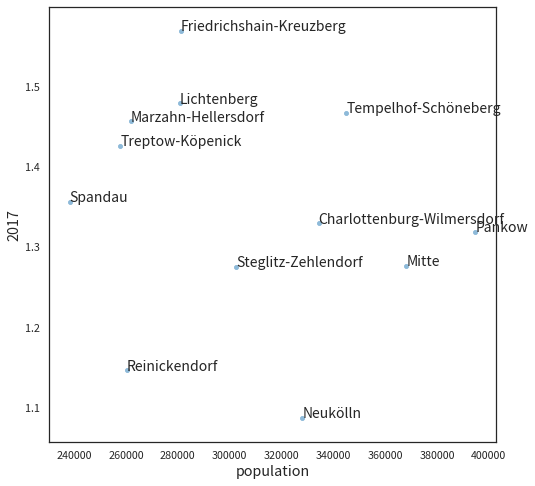

In [173]:
from matplotlib import rcParams
params = {
   'axes.labelsize': 16,
#    'text.fontsize': 8,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
#    'figure.figsize': [4.5, 4.5]
    'font.family': 'sans-serif',
    'font.sans-serif': 'Source Sans Pro',
   }
rcParams.update(params)

fig, ax = plt.subplots(1, figsize=(8,8))
districtsize = counts_districts.groupby(by='bezirk').sum()
totalchange = freq_change.loc[2017]

# compare = pd.concat([districtsize, totalchange], axis=1)
# compare.plot(kind='scatter', x='anzahl', y=2017, ax=ax, alpha=0.5)

compare = pd.concat([population, totalchange], axis=1)
compare.plot(kind='scatter', x='population', y=2017, ax=ax, alpha=0.5)

for name, values in compare.iterrows():
    ax.annotate(name, (values['population'],values[2017]))
plt.show()

# Most popular names

In [8]:
counts_over_time = df.groupby(by=['vorname', 'year']).sum()#.sort_values(by='anzahl',ascending=False)
counts_total = df.groupby(by=['vorname']).sum()
counts_total.sort_values(by='anzahl', ascending=False).head()

anzahl  frequency    year
vorname                             
Marie        3760   0.713232  142991
Sophie       3437   0.656901  120840
Alexander    2261   0.446330  126886
Charlotte    2218   0.406358  122852
Maria        2201   0.391020  205424

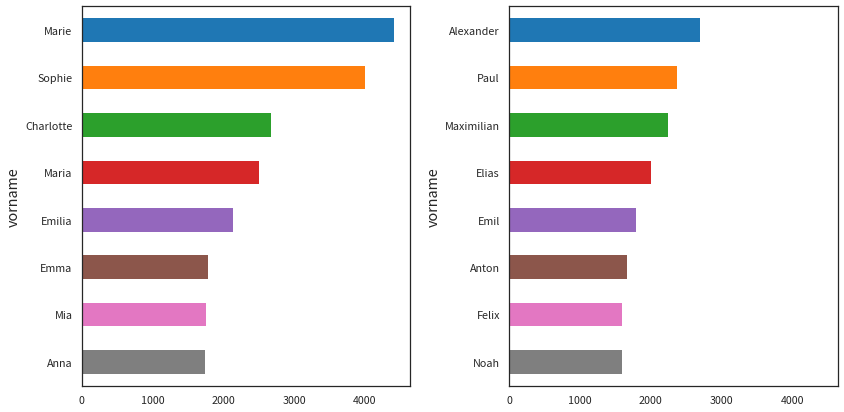

In [141]:
def plot_popular_names_bars(df, n=10):
    fig, axes = plt.subplots(1,2, figsize=(12,6), sharey=False, sharex=True)
    
    for gender, ax in zip(['w', 'm'], axes):
        df_gender = df[ df['geschlecht'] == gender ]
        counts_over_time = df_gender.groupby(by=['vorname', 'year']).sum()#.sort_values(by='anzahl',ascending=False)
        counts_total = df_gender.groupby(by=['vorname']).sum()
        counts_total.sort_values(by='anzahl', ascending=False).head(n).plot(kind='barh', y='anzahl', ax=ax, legend=False)

        ax.invert_yaxis()
    plt.tight_layout()
    plt.show()
    
plot_popular_names_bars(df, n=8)

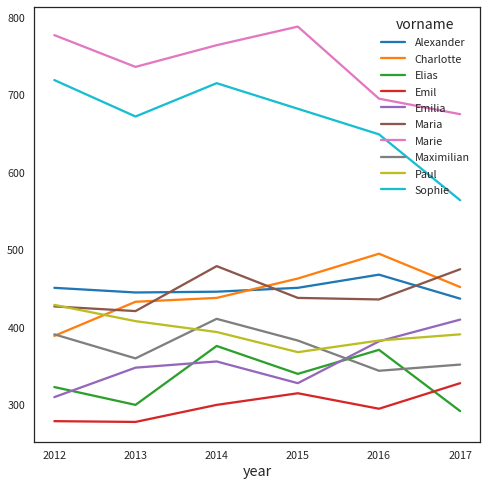

In [142]:
def plot_popular_names_over_time(df, n=10):
    
    fig, ax = plt.subplots(1, figsize=(8,8))
    counts_over_time = df.groupby(by=['vorname', 'year']).sum()#.sort_values(by='anzahl',ascending=False)
    counts_total = df.groupby(by=['vorname']).sum()
    # Most popular names
    names = list(counts_total.sort_values(by='anzahl', ascending=False).index[0:n])
    (counts_over_time.loc[names].reset_index(level=0)
            .pivot(columns='vorname', values='anzahl')
            .plot(kind='line', ax=ax))
    plt.show()
    
plot_popular_names_over_time(df, n=10)

# Trendiest names

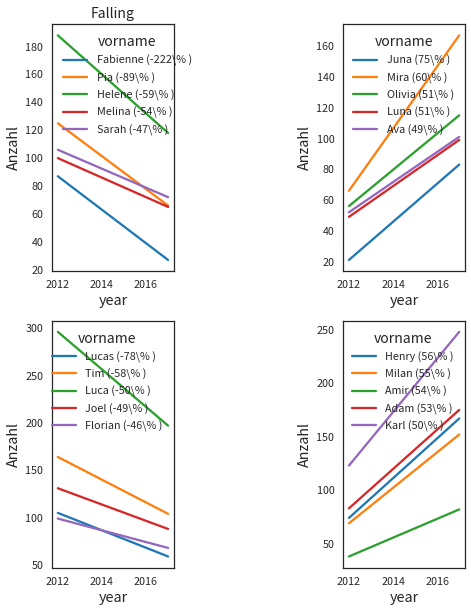

In [145]:
def plot_trendiest_names(df, n=10, cutoff=50):
    " Cutoff = only names with higher count are ranked "
    trend = df.copy()
    trend = trend.groupby(by=['vorname', 'geschlecht', 'year']).sum().reset_index(level=2)
    trend = trend.pivot(columns='year')['anzahl'].sort_values(by=2017, ascending=False)
    trend['trend'] = (trend[2017] - trend[2012]) / trend[2017]
    trend = trend.drop([2013, 2014, 2015, 2016], axis=1)
    trend = trend.reset_index()
    trend['vorname'] = trend.apply(lambda x: '{} ({:.0f}\% )'.format(x.vorname, 100*x.trend), axis=1)
    trend = trend.set_index('vorname')

    fig = plt.figure(figsize=(10,10))
    ax1 = plt.subplot(241)
    ax2 = plt.subplot(243)
    ax3 = plt.subplot(245)
    ax4 = plt.subplot(247)
    
    for gender, axes in zip(['w', 'm'], [(ax1, ax2), (ax3, ax4)]):

        gender_trend = trend[trend['geschlecht']==gender].drop('geschlecht',axis=1)
        falling = gender_trend[ gender_trend[2012] > cutoff ].sort_values(by='trend', ascending=True).head(n)
        rising = gender_trend[ gender_trend[2017] > cutoff ].sort_values(by='trend', ascending=False).head(n)
        falling.T.drop('trend').plot(ax=axes[0])
        rising.T.drop('trend').plot(ax=axes[1])
        axes[0].set_ylabel('Anzahl')
        axes[1].set_ylabel('Anzahl')
    
    ax1.set_title("Falling")    
    plt.show()

plot_trendiest_names(df, n=5, cutoff=80)
# trend.sort_values(by='trend', ascending=True).head(20)
# trend.sort_values(by='trend', ascending=True).tail(10)


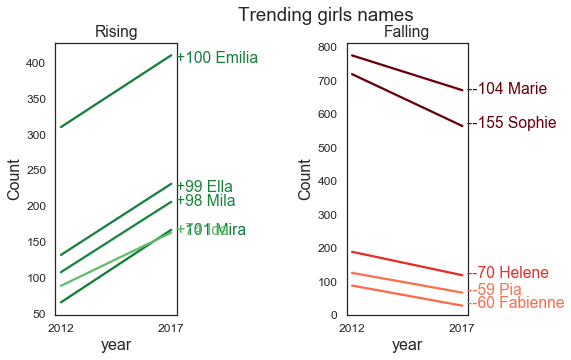

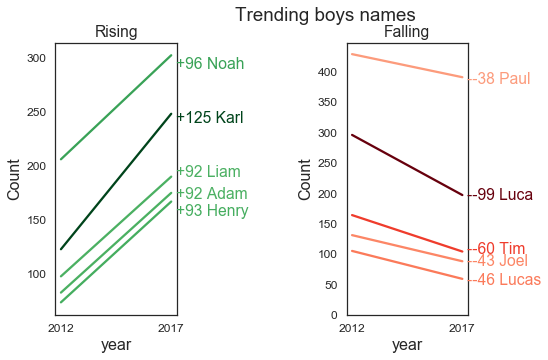

In [150]:
def round_scale_labels(y, name, base=10, shift=3):
    y -= 8 # shift to lower all text
    y = int(base * round(float(y)/base)) # round to closest base
    if name[-5:] == 'Milan':
        y +=4
    elif name[-5:] == 'Henry':
        y -=6
    elif name[-5:] == 'Jakob':
        y -=15
    elif name[-4:] == 'Liam':
        y +=10
    return y

def add_labels(df, ax, color):
    for i, (name, point) in enumerate(df.iterrows()):
        y = round_scale_labels(point[2017], point.name)
        ax.text(2017.2, y, str(point.name), color=color[i])

def plot_trendiest_names_separate(df, n=10, cutoff=50):
    " Cutoff = only names with higher count are ranked "
    sns.set_style("white")
    trend = df.copy()
    trend = trend.groupby(by=['vorname', 'geschlecht', 'year']).sum().reset_index(level=2)
    trend = trend.pivot(columns='year')['anzahl'].sort_values(by=2017, ascending=False)
    trend = trend.reset_index()
    # Absolute
    trend['trend'] = (trend[2017] - trend[2012])
    trend['vorname'] = trend.apply(lambda x: '{}{:.0f} {}'.format("+" if x.trend >= 0 else "-" , x.trend, x.vorname), axis=1)

    # Percentage
    # trend['trend'] = (trend[2016] - trend[2012]) / trend[2016]
    # trend['vorname'] = trend.apply(lambda x: '{}{:.0f}\% {}'.format("+" if x.trend >= 0 else "-" , 100*x.trend, x.vorname), axis=1)

    trend = trend.drop([2013, 2014, 2015, 2016], axis=1)
    
    trend = trend.set_index('vorname')

    for gender in ['w', 'm']:
        fig = plt.figure(figsize=(10,5))
        ax1 = plt.subplot(141)
        ax2 = plt.subplot(143)
        
        # c_girls = sns.cubehelix_palette(8, start=.5, rot=-.75)
        # c_girls = sns.color_palette("Accent")
        # c_boys = sns.color_palette("tab10")
        # colors = c_girls if gender=='w' else c_boys
        gender_trend = trend[trend['geschlecht']==gender].drop('geschlecht',axis=1)
        # colors = gender_trend['trend'].apply(sigmoid)
        cmap_rise = plt.cm.Greens
        cmap_fall = plt.cm.Reds_r
        if gender == 'w':
            norm_rise = matplotlib.colors.Normalize(vmin=+20, vmax=+120)
            norm_fall = matplotlib.colors.Normalize(vmin=-90, vmax=-30)
        else:
            norm_rise = matplotlib.colors.Normalize(vmin=+50, vmax=+120)
            norm_fall = matplotlib.colors.Normalize(vmin=-90, vmax=-10)

        rising = gender_trend[ gender_trend[2017] > cutoff ].sort_values(by='trend', ascending=False).head(n)
        falling = gender_trend[ gender_trend[2012] > cutoff ].sort_values(by='trend', ascending=True).head(n)
#         print(norm_rise(rising.trend.values))
        rising_color = cmap_rise(norm_rise(rising.trend.values))
        falling_color = cmap_fall(norm_fall(falling.trend.values))
        rising.T.drop('trend').plot(ax=ax1, xticks=[2012,2017], color=rising_color, legend=False)
        falling.T.drop('trend').plot(ax=ax2, xticks=[2012,2017], color=falling_color, legend=False)
        # Plot Formatting
        add_labels(rising, ax1, rising_color)
        add_labels(falling, ax2, falling_color)
            
        plt.suptitle("Trending {} names".format('boys' if gender=='m' else 'girls'))
        ax1.set_ylabel('Count')
        ax2.set_ylabel('Count')
        ax2.set_ylim(ymin=0)
        ax1.set_title("Rising")   
        ax2.set_title("Falling")
        plt.show()
        

g = plot_trendiest_names_separate(df, n=5, cutoff=70) # Good: n=5, cutoff 70

## Mean Frequency

In [47]:
name_freqs = df.groupby(by=['vorname', 'geschlecht']).sum()
total_count = df['anzahl'].sum()
name_freqs['mean_freq'] = name_freqs['anzahl']/total_count
name_freqs.sort_values(by='mean_freq', ascending=False).head()

anzahl  frequency    year  mean_freq
vorname   geschlecht                                      
Marie     w             3746   0.711385  120840   0.011487
Sophie    w             3437   0.656901  120840   0.010540
Alexander m             2258   0.445934  120840   0.006924
Charlotte w             2217   0.406224  120840   0.006798
Maria     w             2057   0.368161  120840   0.006308

In [93]:
bezirk_freqs = df.groupby(by=['bezirk', 'vorname']).mean().reset_index(level=0)
# bezirk_freqs = df.groupby(by=['bezirk', 'vorname', 'geschlecht']).mean().reset_index(level=0)

mean_freqs = bezirk_freqs.groupby(by=['vorname']).mean()['frequency']
# mean_freqs = bezirk_freqs.groupby(by=['vorname', 'geschlecht']).mean()['frequency']

mean_freqs.name = 'mean_freq'
# mean_freqs.rename(columns={'frequency': 'mean_freq'}, inplace=True)

compare = pd.merge(bezirk_freqs, mean_freqs.to_frame(), left_index=True, right_index=True)
# mean_freqs.to_frame()
compare['deviation'] = (compare['frequency'] / compare['mean_freq'])-1
# Gather deviations
dfs = []
for bezirk in compare['bezirk'].unique():
    df_dev = compare[ (compare['anzahl']>5) & (compare['bezirk']==bezirk) ].sort_values(by=['deviation'], ascending=False).head(10)
    dfs.append(df_dev)
pd.concat(dfs)

bezirk     anzahl  frequency      year  \
vorname                                                                
Miray           Tempelhof-Schöneberg   7.500000   0.000813  2014.250   
Ali             Tempelhof-Schöneberg  30.000000   0.003270  2014.000   
Ahmet           Tempelhof-Schöneberg   7.250000   0.000794  2014.000   
Kaan            Tempelhof-Schöneberg  10.000000   0.001097  2014.000   
Ela             Tempelhof-Schöneberg  14.600000   0.001579  2014.000   
Jakob           Tempelhof-Schöneberg  42.400000   0.004664  2014.000   
Mateo           Tempelhof-Schöneberg  10.800000   0.001190  2014.000   
Mahir           Tempelhof-Schöneberg   5.750000   0.000614  2014.500   
Emir            Tempelhof-Schöneberg  13.800000   0.001541  2014.000   
Nisa            Tempelhof-Schöneberg   9.200000   0.001009  2014.000   
Muhammed               Reinickendorf   5.600000   0.002872  2014.000   
Ali                    Reinickendorf   8.000000   0.003983  2014.000   
Adam                   Reinickendorf   6.200000   0.003140  2014.000   
Luca                   Reinickendorf  11.800000   0.005878  2014.000   
Lena                   Reinickendorf   8.000000   0.004035  2014.000   
Laura                  Reinickendorf   6.400000   0.003254  2014.000   
Michael                Reinickendorf   5.600000   0.002807  2014.000   
Lara                   Reinickendorf   6.000000   0.003068  2014.000   
Liam                   Reinickendorf   6.000000   0.003097  2014.000   
Daniel                 Reinickendorf   5.200000   0.002673  2014.000   
Pia                      Lichtenberg  16.800000   0.003377  2014.000   
Jolie                    Lichtenberg   7.600000   0.001490  2014.000   
Pepe                     Lichtenberg  11.200000   0.002154  2014.000   
Anh                      Lichtenberg   5.600000   0.001085  2014.000   
Oskar                    Lichtenberg  31.400000   0.006234  2014.000   
Lucy                     Lichtenberg   7.800000   0.001512  2014.000   
Lennard                  Lichtenberg  11.000000   0.002157  2014.000   
Emily                    Lichtenberg  26.800000   0.005262  2014.000   
Joleen                   Lichtenberg   5.400000   0.001040  2014.000   
Jasmin                   Lichtenberg  11.200000   0.002199  2014.000   
...                              ...        ...        ...       ...   
Anh         Friedrichshain-Kreuzberg  15.000000   0.002076  2014.000   
Duc         Friedrichshain-Kreuzberg   6.000000   0.000856  2014.000   
Kevin       Friedrichshain-Kreuzberg  11.600000   0.001645  2014.000   
Nhi         Friedrichshain-Kreuzberg   6.200000   0.000865  2014.000   
Vy          Friedrichshain-Kreuzberg   5.200000   0.000697  2014.000   
Bao         Friedrichshain-Kreuzberg   5.555556   0.000761  2014.000   
Jenny       Friedrichshain-Kreuzberg   6.200000   0.000847  2014.000   
Gia         Friedrichshain-Kreuzberg   5.200000   0.000722  2014.000   
My          Friedrichshain-Kreuzberg   5.200000   0.000742  2014.000   
Huy         Friedrichshain-Kreuzberg   6.600000   0.000929  2014.000   
John             Marzahn-Hellersdorf   5.800000   0.003360  2014.000   
Joel             Marzahn-Hellersdorf   7.800000   0.004507  2014.000   
Nele             Marzahn-Hellersdorf   6.200000   0.003582  2014.000   
Emily            Marzahn-Hellersdorf  10.600000   0.006159  2014.000   
Florian          Marzahn-Hellersdorf   6.000000   0.003356  2014.500   
Tom              Marzahn-Hellersdorf   5.600000   0.003172  2014.000   
Sofia            Marzahn-Hellersdorf   5.400000   0.003087  2014.000   
Melina           Marzahn-Hellersdorf   5.600000   0.003252  2014.000   
Lilly            Marzahn-Hellersdorf   6.000000   0.003444  2014.000   
Pia              Marzahn-Hellersdorf   5.600000   0.003205  2014.000   
Leonard          Steglitz-Zehlendorf   7.250000   0.004171  2014.000   
Leo              Steglitz-Zehlendorf   5.400000   0.003098  2014.000   
Alexander        Steglitz-Zehlendorf  18.800000   0.011018  2014.000  

In [35]:
name_counts = df.groupby(by=['year', 'vorname', 'geschlecht']).sum()['anzahl']
name_counts = name_counts.reset_index(level=0)
yearly_counts = name_counts.groupby(by='year').sum()
yearly_counts.rename(columns={'anzahl': 'total'}, inplace=True)
name_counts = pd.merge(name_counts, yearly_counts, left_on='year', right_index=True)
name_counts['mean_freq'] = name_counts.anzahl / name_counts.total
name_counts
# name_counts['mean_freq'] = name_counts.apply(lambda x: )
# yearly_counts

year  anzahl  total  mean_freq
vorname      geschlecht                                
(Eigenname)  m           2012       1  61814   0.000016
             w           2012       1  61814   0.000016
(Vorname     m           2012       1  61814   0.000016
             w           2012       1  61814   0.000016
(Vornamen    m           2012       1  61814   0.000016
A.           m           2012       1  61814   0.000016
Aad-Bo       m           2012       1  61814   0.000016
Aaiyscha     w           2012       1  61814   0.000016
Aakash       m           2012       1  61814   0.000016
Aala         w           2012       1  61814   0.000016
Aalias       m           2012       1  61814   0.000016
Aalisha      w           2012       1  61814   0.000016
Aaliyah      w           2012      19  61814   0.000307
Aaliyzee     w           2012       1  61814   0.000016
Aamir        m           2012       1  61814   0.000016
Aamu         w           2012       1  61814   0.000016
Aaren-Tapani m           2012       1  61814   0.000016
Aaron        m           2012      81  61814   0.001310
Aaron-Dan    m           2012       1  61814   0.000016
Aaron-Jason  m           2012       1  61814   0.000016
Aaron-Marlic m           2012       1  61814   0.000016
Aaruyan      m           2012       1  61814   0.000016
Aarón        m           2012       1  61814   0.000016
Abalfazl     m           2012       1  61814   0.000016
Abas         m           2012       1  61814   0.000016
Abass        m           2012       1  61814   0.000016
Abbas        m           2012      12  61814   0.000194
Abbass       m           2012       1  61814   0.000016
Abbie        w           2012       1  61814   0.000016
Abbigail     w           2012       1  61814   0.000016
...                       ...     ...    ...        ...
Śeki         m           2016       1  69510   0.000014
Şafak        w           2016       1  69510   0.000014
Şahin-Ekber  m           2016       1  69510   0.000014
Şahinder     w           2016       1  69510   0.000014
Şamil        m           2016       1  69510   0.000014
Şehriban     w           2016       1  69510   0.000014
Şeker        m           2016       1  69510   0.000014
Şelin        w           2016       1  69510   0.000014
Şemsi        w           2016       1  69510   0.000014
Şenay        w           2016       1  69510   0.000014
Şenol        m           2016       2  69510   0.000029
Şerife       w           2016       2  69510   0.000029
Şervan       m           2016       1  69510   0.000014
Şerwin       w           2016       1  69510   0.000014
Şevket       m           2016       1  69510   0.000014
Şevval       w           2016       1  69510   0.000014
Şeyma        w           2016       1  69510   0.000014
Şilan        w           2016       2  69510   0.000029
Şirin        w           2016       2  69510   0.000029
Ştefan       m           2016       1  69510   0.000014
Şuara        w           2016       1  69510   0.000014
Şura         w           2016       4  69510   0.000058
Şükrü        m           2016       2  69510   0.000029
Şıh          m           2016       1  69510   0.000014
Šehida       w           2016       1  69510   0.000014
Žarko        m           2016       1  69510   0.000014
Željko       m           2016       1  69510   0.000014
Živorad      m           2016       1  69510   0.000014
Ștefan       m           2016       1  69510   0.000014
Ștefania     w           2016       1  69510   0.000014

[63783 rows x 4 columns]

# OLD

## Frequencies

In [20]:
# Group names, calculate most common nampes
dfgroup = df[['year','vorname','anzahl','geschlecht']].groupby(by=['vorname', 'geschlecht']).sum()
dfgroup = dfgroup.sort_values('anzahl', ascending=False)
#dfgroup.assign(name = dfgroup.index)
#plt.bar(dfgroup[0:10].index, dfgroup['anzahl'][0:10])
# barcolors = [ 'r' if row[0][1]=='m' else 'b' for row in dfgroup[0:20].iterrows()]
# barcolors = ['r', 'g'] * 20
colors = {'w': 'r', 'm': 'b'}
df['geschlecht'].map(colors)
dfgroup.plot(kind='bar', x=df.loc[0:10], y='anzahl', color=df['geschlecht'].map(colors))
most_common_names = list(dfgroup[0:300].index)
print('Most common names: ', most_common_names[0:10])
plt.show()
#dfgroup.index
#for vorname in dfgroup['vorname'].unique():
#    nameseries = dfgroup[dfgroup['vorname'] == vorname]
#    plt.plot(nameseries['Year'], nameseries['anzahl'], label=vorname )

KeyError: 'Cannot get left slice bound for non-unique label: 0'

In [57]:
colors = {'N':'#00BEC5', 'Y':'#F9746A'}
df.sort_values('RANK', inplace=True)
df.plot.bar(x='SAMPLE', y='RANK',color= df['VALUE'].map(colors));

Index(['year', 'anzahl'], dtype='object')

In [37]:
# Calculate the mean frequency of the most common names per year
mean_freqs = pd.DataFrame(columns=['vorname', 'year', 'mean_freq', 'geschlecht'])
for name, geschlecht in most_common_names: #df['vorname'].unique():
    for year in df['year'].unique():
        mean_freq = df[ (df['vorname'] == name) & (df['year']==year) & (df['geschlecht']==geschlecht)]['frequency'].mean()
#        mean_freqs.append(pd.DataFrame([name, year, mean_freq]))
        mean_freqs.loc[mean_freqs.shape[0]] = [name, year, mean_freq, geschlecht]

mean_freqs['id'] = mean_freqs['vorname'] + mean_freqs['geschlecht'] + mean_freqs['year'].map(int).map(str)
#mean_freqs['id'].apply(lambda x: str(x['vorname']) + str(x['year']))
mean_freqs.head(10)

vorname    year  mean_freq geschlecht           id
0   Marie  2012.0   0.012783          w   Mariew2012
1   Marie  2013.0   0.011896          w   Mariew2013
2   Marie  2014.0   0.011554          w   Mariew2014
3   Marie  2015.0   0.012445          w   Mariew2015
4   Marie  2016.0   0.010603          w   Mariew2016
5  Sophie  2012.0   0.012550          w  Sophiew2012
6  Sophie  2013.0   0.011471          w  Sophiew2013
7  Sophie  2014.0   0.011502          w  Sophiew2014
8  Sophie  2015.0   0.010157          w  Sophiew2015
9  Sophie  2016.0   0.009063          w  Sophiew2016

In [38]:
# Add mean_freq to df (RUN ONLY ONCE)
df['id'] = df['vorname'] + df['geschlecht'] + df['year'].map(str)
df = pd.merge(df, mean_freqs[['mean_freq','id']], on='id', how='outer')
df.head()

anzahl                      bezirk  frequency geschlecht vorname  year  \
0     122  charlottenburg-wilmersdorf   0.013676          w   Marie  2012   
1      66    friedrichshain-kreuzberg   0.010563          w   Marie  2012   
2      53                 lichtenberg   0.011822          w   Marie  2012   
3      21         marzahn-hellersdorf   0.012696          w   Marie  2012   
4      83                       mitte   0.010241          w   Marie  2012   

           id  mean_freq  
0  Mariew2012   0.012783  
1  Mariew2012   0.012783  
2  Mariew2012   0.012783  
3  Mariew2012   0.012783  
4  Mariew2012   0.012783

## Trends

In [67]:
df_trend = df[ (df['year']==2012) | (df['year']==2016)]
df_trend[df_trend['year']==2016].head(50)
df_trend['idbezirk'] = df_trend['vorname'] + ' ' + df_trend['geschlecht'] + ' '+ df_trend['bezirk']
df_trend = df_trend.pivot(index='idbezirk',columns='year', values='anzahl')
df_trend = df_trend.fillna(0)
#df_trend.assign(trend = lambda x: (x[2016]-x[2012])/x[2012] if (x[2012] != 0) else inf  )
df_trend = df_trend[df_trend[2012]!=0.0]
df_trend = df_trend.assign(trend = lambda x: (x[2016]-x[2012])/x[2012] )
df_trend = df_trend.sort_values('trend', ascending=False)
df_trend.head(5)
#df['freq_2012'] = df['frequency']
#df['freq_2016'] = df['frequency']
#df.groupby(by=[])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


year                                 2012  2016  trend
idbezirk                                              
Theo m neukoelln                      1.0  12.0   11.0
Alicia w charlottenburg-wilmersdorf   1.0  11.0   10.0
Valerie w tempelhof-schoeneberg       1.0  11.0   10.0
Ava w friedrichshain-kreuzberg        1.0  11.0   10.0
Elyas m tempelhof-schoeneberg         1.0  10.0    9.0

In [68]:
#df_trend['vorname'], df_trend['geschlecht'], df_trend['bezirk'] = pd.Series(df_trend.index).str.split(' ',2,expand=True)
split_index = pd.Series(df_trend.index, index=df_trend.index).str.split(' ',2, expand=True)
split_index = split_index.rename(columns={0:'vorname', 1:'geschlecht', 2:'bezirk'})
df_trend = pd.concat([df_trend, split_index], axis=1, join_axes=[df_trend.index])

In [71]:
print("Trendigste Namen im Bezirk")
df_trend[(df_trend['bezirk'] == 'mitte')&(df_trend[2016]>30)].head(20)

Trendigste Namen im Bezirk


2012  2016     trend     vorname geschlecht bezirk
idbezirk                                                              
Charlotte w mitte   26.0  47.0  0.807692   Charlotte          w  mitte
Anna w mitte        30.0  48.0  0.600000        Anna          w  mitte
Anton m mitte       25.0  31.0  0.240000       Anton          m  mitte
Elias m mitte       31.0  36.0  0.161290       Elias          m  mitte
Maria w mitte       47.0  52.0  0.106383       Maria          w  mitte
Maximilian m mitte  38.0  40.0  0.052632  Maximilian          m  mitte
Sophie w mitte      69.0  69.0  0.000000      Sophie          w  mitte
Paul m mitte        48.0  46.0 -0.041667        Paul          m  mitte
Ali m mitte         35.0  33.0 -0.057143         Ali          m  mitte
Alexander m mitte   53.0  45.0 -0.150943   Alexander          m  mitte
Emilia w mitte      39.0  33.0 -0.153846      Emilia          w  mitte
Marie w mitte       83.0  61.0 -0.265060       Marie          w  mitte

In [73]:
print("Trendigste Namen in Berlin")
df_trend[(df_trend[2016]>50)].head(20)

Trendigste Namen in Berlin


2012   2016     trend     vorname  \
idbezirk                                                                     
Charlotte w friedrichshain-kreuzberg     28.0   64.0  1.285714   Charlotte   
Sophia w tempelhof-schoeneberg           27.0   52.0  0.925926      Sophia   
Maria w tempelhof-schoeneberg            56.0   82.0  0.464286       Maria   
Emilia w tempelhof-schoeneberg           41.0   60.0  0.463415      Emilia   
Emma w tempelhof-schoeneberg             37.0   54.0  0.459459        Emma   
Alexander m charlottenburg-wilmersdorf   53.0   68.0  0.283019   Alexander   
Noah m charlottenburg-wilmersdorf        43.0   54.0  0.255814        Noah   
Charlotte w pankow                       65.0   81.0  0.246154   Charlotte   
Sophie w neukoelln                       46.0   57.0  0.239130      Sophie   
Emilia w charlottenburg-wilmersdorf      61.0   73.0  0.196721      Emilia   
Alexander m tempelhof-schoeneberg        62.0   73.0  0.177419   Alexander   
Marie w lichtenberg                      53.0   59.0  0.113208       Marie   
Maria w mitte                            47.0   52.0  0.106383       Maria   
Alexander m pankow                       63.0   68.0  0.079365   Alexander   
Charlotte w tempelhof-schoeneberg        59.0   63.0  0.067797   Charlotte   
Marie w pankow                          107.0  112.0  0.046729       Marie   
Maximilian m pankow                      51.0   51.0  0.000000  Maximilian   
Sophie w mitte                           69.0   69.0  0.000000      Sophie   
Sophie w charlottenburg-wilmersdorf     105.0  105.0  0.000000      Sophie   
Sophie w lichtenberg                     70.0   70.0  0.000000      Sophie   

                                       geschlecht                      bezirk  
idbezirk                                                                       
Charlotte w friedrichshain-kreuzberg            w    friedrichshain-kreuzberg  
Sophia w tempelhof-schoeneberg                  w       tempelhof-schoeneberg  
Maria w tempelhof-schoeneberg                   w       tempelhof-schoeneberg  
Emilia w tempelhof-schoeneberg                  w       tempelhof-schoeneberg  
Emma w tempelhof-schoeneberg                    w       tempelhof-schoeneberg  
Alexander m charlottenburg-wilmersdorf          m  charlottenburg-wilmersdorf  
Noah m charlottenburg-wilmersdorf               m  charlottenburg-wilmersdorf  
Charlotte w pankow                              w                      pankow  
Sophie w neukoelln                              w                   neukoelln  
Emilia w charlottenburg-wilmersdorf             w  charlottenburg-wilmersdorf  
Alexander m tempelhof-schoeneberg               m       tempelhof-schoeneberg  
Marie w lichtenberg                             w                 lichtenberg  
Maria w mitte                                   w                       mitte  
Alexander m pankow                              m                      pankow  
Charlotte w tempelhof-schoeneberg               w       tempelhof-schoeneberg  
Marie w pankow                                  w                      pankow  
Maximilian m pankow                             m                      pankow  
Sophie w mitte                                  w                       mitte  
Sophie w charlottenburg-wilmersdorf             w  charlottenburg-wilmersdorf  
Sophie w lichtenberg                            w                 lichtenberg

In [42]:
test = pd.Series(df_trend.index, index=df_trend.index).str.split(' ',2, expand=True)
#test.index = df_trend.index
test.head()

0  1                         2
idbezirk                                                                     
(Eigenname) m reinickendorf          (Eigenname)  m             reinickendorf
Maj w tempelhof-schoeneberg                  Maj  w     tempelhof-schoeneberg
Maj w friedrichshain-kreuzberg               Maj  w  friedrichshain-kreuzberg
Maitreya w friedrichshain-kreuzberg     Maitreya  w  friedrichshain-kreuzberg
Maita w spandau                            Maita  w                   spandau

### Ungewöhnlich häufige Vornamen

In [9]:
df['freq_dev'] = (df['frequency'] - df['mean_freq']) / df['mean_freq']
df_freq = df.sort_values('freq_dev', ascending=False)
df_freq[(df_freq['bezirk']=='reinickendorf') & (df_freq['year']==2016) & (df_freq['frequency']>0.0)].dropna().head()

KeyError: 'mean_freq'

In [65]:
# Extract top 5 for each bezirk and save to csv
#save_df.append(df_freq)
for year in [2012, 2016]:
    save_df = pd.DataFrame(data=None, columns=df_freq.columns)
    for bezirk in bezirke:
        for geschlecht in ['m', 'w']:
            save_df = save_df.append(
                df_freq[(df_freq['bezirk']==bezirk) & (df_freq['geschlecht']==geschlecht) & (df_freq['year']==year) & (df_freq['frequency']>0.0)].dropna().sort_values('freq_dev', ascending=False).head(7)
            )
    save_df['freq_dev'] = save_df['freq_dev'].apply(lambda x: int(x*100)) 
    save_df['bezirk'] = save_df['bezirk'].apply(lambda x: x.replace('oe','ö').title())
    save_df = save_df[['bezirk', 'geschlecht', 'vorname', 'anzahl', 'freq_dev']]
    save_df.to_csv('../data/processed/beliebte_namen_'+str(year)+'.csv', sep=',', index=False)

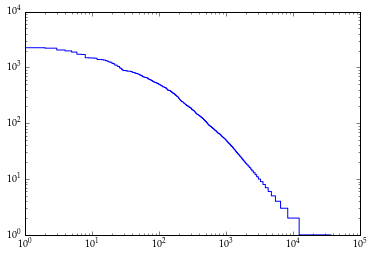

In [45]:
plt.step(x=range(len(dfgroup)),y=dfgroup[ dfgroup['anzahl']>0]['anzahl'])
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

In [46]:
dfgroup2 = df[['Year', 'vorname', 'anzahl']].groupby(by=['vorname', 'Year']).sum()
#dfgroup2 = df[['Year', 'vorname', 'anzahl']].groupby(['vorname', 'Year']).sum().groupby('Year')

#dfgroup2.reset_index()
dfgroup2 = dfgroup2.sort_values('anzahl', ascending=False)
best_names = dfgroup2.index.get_level_values('vorname').unique()[0:10]
#years = dfgroup2.index.get_level_values('Year').unique()
#dfgroup2.iloc[ dfgroup2.index['Year']==2015 ]

#dfgroup2.loc['Marie'].sort_index()
for name in best_names:
    #dfgroup2.loc[name].sort_index().plot.line() 
    plt.plot(dfgroup2.loc[name].sort_index(), label=name)
plt.legend(loc='right')
#dfgroup2.iloc[dfgroup2.index.get_level_values('Year') == 2015]

KeyError: "['Year'] not in index"

In [ ]:
dfgroup.head()

In [ ]:
dfgroup = df.groupby(by=['Year', 'Bezirk', 'vorname']).sum()
dfgroup.head(10)